### Stratified K-Fold Cross-Validation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

df_cv = pd.read_csv('Datasets/train.csv', delimiter=';')

# We create a new column called kfold and fill it with -1
df_cv['kfold'] = -1

# The next step is to randomize the rows of the data
df_cv = df_cv.sample(frac=1).reset_index(drop=True)

# Fetch Target(quality)
y = df_cv.quality.values

# Initiate the KFold Class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# Fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_cv, y=y)):
    df_cv.loc[val_, 'kfold'] = fold
    
df_cv.to_csv("Datasets/train_Stratifiedfolds.csv", index=False)    

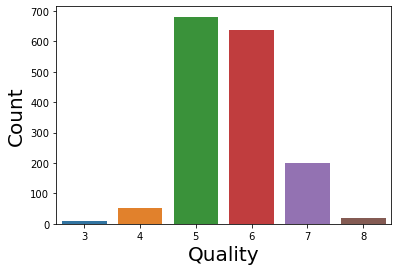

In [4]:
# For a Wine Dataset, Let's Look at the distribution of labels
wine_quality = sns.countplot(x='quality', data=df_cv)
wine_quality.set_xlabel("Quality", fontsize=20)
wine_quality.set_ylabel("Count", fontsize=20)
plt.show()